<font color='blue'> First of all, please “Copy to Drive” to get your own copy for editing. </font>

<font color='red'> Run all the cells. For places with "Complete the codes below", please replace the "XXX" placeholder with your own codes.</font>

# Types of Learning

Machine learning algorithms fall into the primary categories:

1. **Supervised Learning** - the model will learn from labeled data

2. **Unsupervised Learning** - the model will learn from unlabeled data

3. **Semi-Supervised Learning** - the model will learn with a training data in which some is labeled, some not, and both are used during training

4. **Reinforcement Learning** - the model will learn which action to take based on reinforcement from environment so to maximize/minimize a reward/penalty on a  trial-and-error basis

Other types of learning include:

5. **Multiple Instance Learning** - (type of supervised learning) the model will learn based on multiple-instance labels that have a particular form of imprecision

6. **Active Learning** - (type of supervised learning) the model will learn by obtaining labels online from a user/oracle in an intelligent fashion

7. **Transfer Learning** - the model will learn by transferring learnt knowledge from a similar task.

and many more...

# Supervised Learning: Classification
**Classification** is a form of predictive modeling approach to characterize the relationship between some collection of observational input data and a set of categorical labels.

In the **Titanic dataset**, we have training data from two classes, class 0 means "not survived" and class 1 means "survived". Classification means to train a classifier to assign a lable to incoming testing dataset whether they belong to class 0 or class 1(die or survive).

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd drive/MyDrive/Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LogisticRegressionCV
#from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Step1:Data preprocessing

In [ ]:
diabets = pd.read_csv('diabetes2.csv')

In [ ]:
diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabets.describe()
# No missing values are present. However from the results we can see that Glucose, BloodPressure, SkinThickness, Insulin
# and BMI have min values of 0 which are not real clinical values. Lets look at counts. A value of 0 for Pregnancies is a real value.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print("Number of 0's for Glucose:", diabets['Glucose'].isin([0]).sum())
print("Number of 0's for Blood Pressure:", diabets['BloodPressure'].isin([0]).sum())
print("Number of 0's for Skin Thickness:", diabets['SkinThickness'].isin([0]).sum())
print("Number of 0's for Insulin:", diabets['Insulin'].isin([0]).sum())
print("Number of 0's for BMI:", diabets['BMI'].isin([0]).sum())

Number of 0's for Glucose: 5
Number of 0's for Blood Pressure: 35
Number of 0's for Skin Thickness: 227
Number of 0's for Insulin: 374
Number of 0's for BMI: 11


In [ ]:
# Make copy of data set before making minor wrangling operations as we don't want to edit our row data
diabets_clean = diabets.copy()

In [ ]:
# Replacing 0 values in these columns with mean
diabets_clean['Glucose'] = diabets_clean['Glucose'].replace(0,diabets['Glucose'].mean())
diabets_clean['BloodPressure'] = diabets_clean['BloodPressure'].replace(0,diabets['BloodPressure'].mean())
diabets_clean['SkinThickness'] = diabets_clean['SkinThickness'].replace(0,diabets['SkinThickness'].mean())
diabets_clean['Insulin'] = diabets_clean['Insulin'].replace(0,diabets['Insulin'].mean())
diabets_clean['BMI'] = diabets_clean['BMI'].replace(0,diabets['BMI'].mean())

In [ ]:
# Changing number of pregancies to a binary variable. Where any pregnancy > 0 is returned a value of 1. Since no pregnancies is
# already encoded as 0 this does not need to be changed
diabets_clean['Pregnancies'].values[diabets_clean['Pregnancies'] > 0] = 1

In [ ]:
diabets_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,0.351857,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,1.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Step2: Exploratory Data Analysis (skip for now)

In [ ]:
# skip for now

## Step3: Train-test-split

In [ ]:
# Get X and y
y = diabets_clean['Outcome']
X = diabets_clean.drop(columns = ['Outcome'])
print(X.shape, y.shape)

(768, 8) (768,)


In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


## Step4: Model, predict and solve the problem

```
Select a model:
      model = LogisticRegression()
Model fitting:
      model.fit(X_train, y_train)
Model prediction:
      y_predict = model.predict(X_test)
Model performance:
      score = model.score(X_test, y_test)
...
```



**Logistic Regression:**

In [ ]:
# Initial model

model0 = LogisticRegression()

model0.fit(X_train, y_train)
y_predict = model0.predict(X_test)
model0_score = model0.score(X_test, y_test)

print(f"Accuracy:", round(model0_score,3))

Accuracy: 0.792


### Confusion Matrix

In [ ]:
# Get predicted labels
model0.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
# Get predicted probabilities
model0.predict_proba(X_test)

array([[0.02910369, 0.97089631],
       [0.84072715, 0.15927285],
       [0.90908568, 0.09091432],
       [0.29660367, 0.70339633],
       [0.8315477 , 0.1684523 ],
       [0.95932139, 0.04067861],
       [0.34008355, 0.65991645],
       [0.09206777, 0.90793223],
       [0.50782745, 0.49217255],
       [0.61736314, 0.38263686],
       [0.42434172, 0.57565828],
       [0.0226173 , 0.9773827 ],
       [0.64945194, 0.35054806],
       [0.74110812, 0.25889188],
       [0.91034431, 0.08965569],
       [0.78916486, 0.21083514],
       [0.17846285, 0.82153715],
       [0.96958169, 0.03041831],
       [0.53962516, 0.46037484],
       [0.74516461, 0.25483539],
       [0.34294055, 0.65705945],
       [0.52655853, 0.47344147],
       [0.89853451, 0.10146549],
       [0.93908062, 0.06091938],
       [0.94137939, 0.05862061],
       [0.61160601, 0.38839399],
       [0.94993364, 0.05006636],
       [0.15914442, 0.84085558],
       [0.89532357, 0.10467643],
       [0.87612349, 0.12387651],
       [0.

Accuracy: 0.792
Precision: 0.692
Recall: 0.574
F1 Score: 0.628


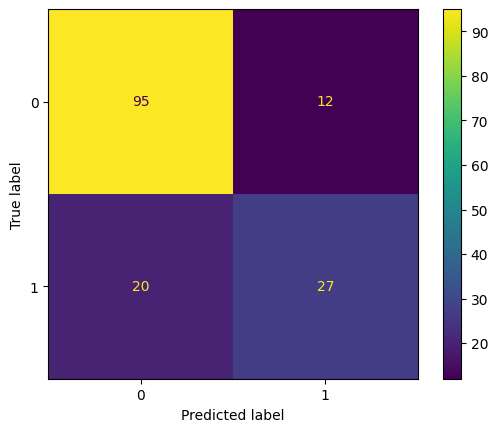

In [ ]:
# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(y_test, model0.predict(X_test))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, model0.predict(X_test))
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, model0.predict(X_test))
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, model0.predict(X_test))
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(y_test, model0.predict(X_test))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<font color='red'> Based on Confusion Matrix above, please manually calculate precision, recall, F-measure and accuracy.

In [ ]:
# Calculate precision: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
27/(27+12)  # precision = tp/(tp+fp)

0.6923076923076923

In [ ]:
# Calculate recall: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
27/(27+20)  # recall = tp/(tp+fn)

0.574468085106383

In [ ]:
# Calculate f1 score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
precision = 27/(27+12)
recall = 27/(27+20)
2*(precision*recall)/(precision+recall)

0.627906976744186

In [ ]:
# Calculate accuracy: https://en.wikipedia.org/wiki/Confusion_matrix
(27+95) / (27+95+12+20)

0.7922077922077922

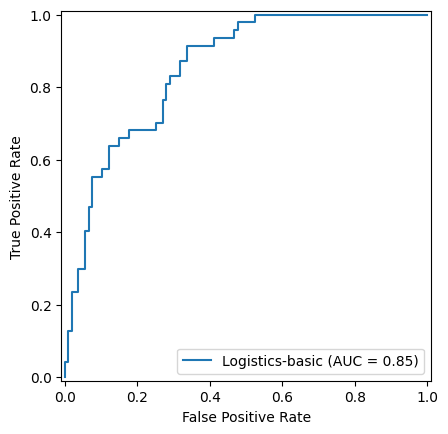

In [ ]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,model0.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Logistics-basic')
display.plot()

plt.show()

<font color='red'> What does **auc** mean? (Please check ICP_Week7A)

<font color='red'> Answer:

### Hyper-parameter tuning

to get the best parametetrs/estimator

**Hyper-parameter tuning**:

The differences between a hyperparameter and a parameter in machine learning.

* `Model parameters`: These are the parameters that are estimated by the model from the given data. For example, the coefficients of a linear model and the weights of a deep neural network.
* `Model hyperparameters`: These are the parameters that cannot be estimated by the model from the given data. These parameters are used to estimate the model parameters. For example,  the max_depth in random forest model, the learning rate in deep neural networks.


Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. It can be as simple as the following:
* How many trees should I include in my random forest?
* What degree of polynomial features should I use for my linear model?
* What should be the maximum depth allowed for my decision tree?
* How many layers should I have in my neural network?
* What should I set my learning rate to for gradient descent?

Steps to tune the parameters:
1. Prioritize those parameters which have the most effect on our model. (Example: n-neighbors bor KNN, n-estimators for random forest etc.)
2. Set various values to these parameters and store them in a **dictionary** as shown below.
3. Create an object of the GridSearchCV class or the RandomizedSearchCV and assign the parameters to it.
4. Fit the training set in the object.
5. We will get the best parameters from the best_estimator_ property of the object.


Two commonly-used hyper-parameter optimizers(scikit-learn):
* class `sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, ...)`https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#
* class `sklearn.model_selection.RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, ...)`https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#

In [ ]:
# Hyperparemter tuning with RandomizedSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Define the hyperparameter grid ---feel free to customize these
param_grid_lg = {'solver': ['saga', 'liblinear'],
                  'penalty': ['l1','l2'],
                 'C': [0.001,0.01,0.1,1,10,100,1000],
                  'max_iter' : [10,100,500]}

# Initialize GridSearchCV
lg_grid = RandomizedSearchCV(estimator=LogisticRegression(),  # the model
                            param_distributions=param_grid_lg,  # hyperparameter space
                             scoring='roc_auc')  # default: 5 folder cross-validation

In [ ]:
# Fit the model to the data
lg_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'max_iter': [10, 100, 500],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'liblinear']},
                   scoring='roc_auc')

In [ ]:
# Get the best parametetrs
print(lg_grid.best_params_)

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 10, 'C': 100}


Accuracy: 0.714
Precision: 0.541
Recall: 0.426
F1 Score: 0.476


Text(113.9222222222222, 0.5, 'predicted label')

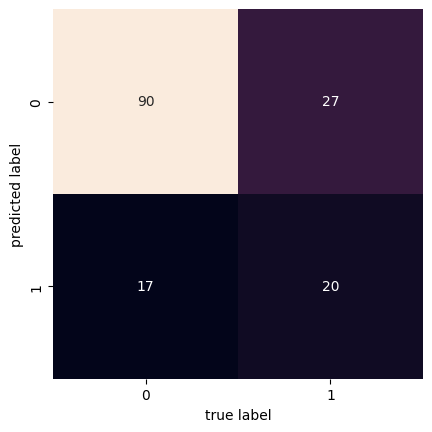

In [ ]:
# Logistic Regression Model Performance for test data
lgmodel = lg_grid.best_estimator_

# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(y_test, lgmodel.predict(X_test))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, lgmodel.predict(X_test))
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, lgmodel.predict(X_test))
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, lgmodel.predict(X_test))
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(y_test, lgmodel.predict(X_test))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

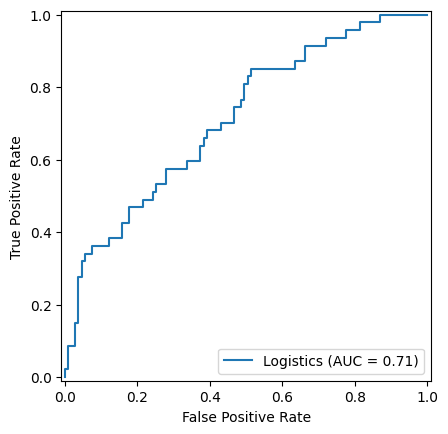

In [ ]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,lgmodel.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Logistics')
display.plot()

plt.show()

<font color='red'> Replacing XXX in following codes. (Similar to the steps in using RandomizedSearchCV above for logistic regression)

In [ ]:
# Hyperparemter tuning with GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#

# Define the hyperparameter grid---feel free to customize these
lg2 = LogisticRegression()
param_grid_lg2 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]}


# Initialize GridSearchCV
lg_grid2 = GridSearchCV(param_grid=param_grid_lg2, estimator=lg2)

In [ ]:
# Fit the model to the data
lg_grid2.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']})

In [ ]:
# Get the best parametetrs and the best estimator
print(lg_grid2.best_params_)
best_lg2 = lg_grid2.best_estimator_

{'C': 0.001, 'max_iter': 100, 'penalty': None, 'solver': 'lbfgs'}


Accuracy: 0.792
Precision: 0.683
Recall: 0.596
F1 Score: 0.636


Text(113.9222222222222, 0.5, 'predicted label')

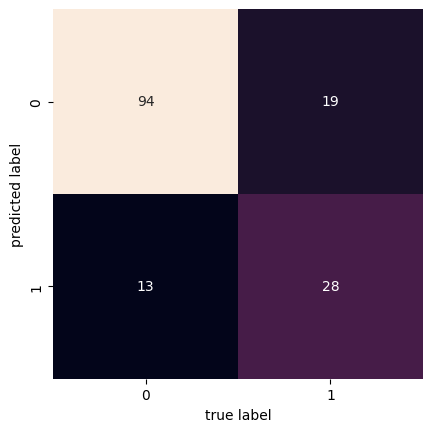

In [ ]:
# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(y_test, best_lg2.predict(X_test))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, best_lg2.predict(X_test))
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, best_lg2.predict(X_test))
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, best_lg2.predict(X_test))
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(y_test, best_lg2.predict(X_test))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

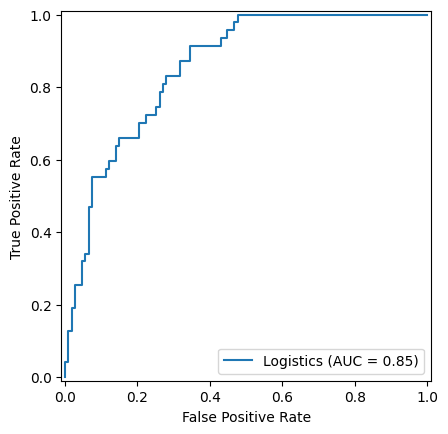

In [ ]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_lg2.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Logistics')
display.plot()

plt.show()